<a href="https://colab.research.google.com/github/danny4159/Classification-of-spinal-cord-tumors/blob/master/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Convolution2D, MaxPooling2D, ZeroPadding2D, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop

from keras.applications.vgg16 import VGG16, preprocess_input

sns.set(style='white', context='notebook', palette='deep')

In [ ]:
# VGG16은 RGB형식의 3차원 데이터를 강제요구한다.

# X_train : RGB로 3차원 그대로 받아서 label만 drop한다
# Y_train : 이건 3차원으로 받을 수 없다. 따라서 그레이스케일로 1차원으로 그대로 받아서 label만 남긴다.

In [ ]:
from google.colab import files
uploaded_train_32_rgb = files.upload()

Saving train_32_rgb.csv to train_32_rgb.csv


In [ ]:
from google.colab import files
uploaded_train_32_l = files.upload()

Saving train_32_l.csv to train_32_l.csv


In [ ]:
from google.colab import files
uploaded_test = files.upload()

Saving test.csv to test.csv


In [ ]:
import io
X_train = pd.read_csv(io.BytesIO(uploaded_train_32_rgb['train_32_rgb.csv']))
Y_train = pd.read_csv(io.BytesIO(uploaded_train_32_l['train_32_l.csv']))
test = pd.read_csv(io.BytesIO(uploaded_test['test.csv']))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


3    105
1    105
0    103
2     83
Name: label, dtype: int64

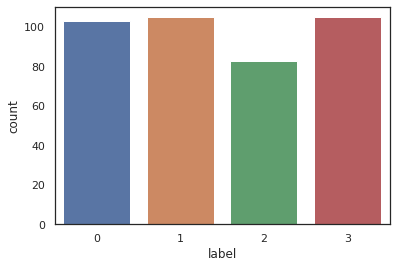

In [ ]:
Y_train = Y_train["label"]

# 'label' column 을 drop
X_train = X_train.drop(labels = ["label"],axis = 1) 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [ ]:
X_train = X_train / 255.0
test = test / 255.0

X_train = X_train.values.reshape(-1,32,32,3)
# test = test.values.reshape(-1,28,28,1)

In [ ]:
Y_train = to_categorical(Y_train, num_classes = 4)

In [ ]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
                                                  test_size = 0.1, 
                                                  random_state=random_seed)

In [ ]:
# 모델정의

# 출처 : https://github.com/simongeek/KerasVGGcifar10

In [ ]:
model = Sequential()

model.add(ZeroPadding2D((1, 1), input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))  # num_classes
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_13 (ZeroPaddi (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)       

In [ ]:
model.compile(optimizer = Adam(lr=0.001), loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(X_train, Y_train, epochs=30, validation_data=(X_val,Y_val))

Epoch 1/30
12/12 [==============================] - 1s 57ms/step - loss: 1.4813 - accuracy: 0.2500 - val_loss: 1.3865 - val_accuracy: 0.2000
Epoch 2/30
12/12 [==============================] - 0s 33ms/step - loss: 1.3881 - accuracy: 0.2753 - val_loss: 1.3778 - val_accuracy: 0.2000
Epoch 3/30
12/12 [==============================] - 0s 34ms/step - loss: 1.3843 - accuracy: 0.2640 - val_loss: 1.3755 - val_accuracy: 0.2000
Epoch 4/30
12/12 [==============================] - 0s 33ms/step - loss: 1.3840 - accuracy: 0.2753 - val_loss: 1.3847 - val_accuracy: 0.2000
Epoch 5/30
12/12 [==============================] - 0s 34ms/step - loss: 1.3835 - accuracy: 0.2725 - val_loss: 1.3906 - val_accuracy: 0.2000
Epoch 6/30
12/12 [==============================] - 0s 32ms/step - loss: 1.3873 - accuracy: 0.2725 - val_loss: 1.3940 - val_accuracy: 0.2000
Epoch 7/30
12/12 [==============================] - 0s 33ms/step - loss: 1.3836 - accuracy: 0.2669 - val_loss: 1.3754 - val_accuracy: 0.2750
Epoch 8/30
12

In [ ]:
# 포기한 방법

In [ ]:
# model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

In [ ]:
# model.compile(optimizer = Adam(lr=0.001) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# model.fit(X_train, Y_train, epochs=30, validation_data=(X_val,Y_val))

Epoch 1/30


ValueError: ignored